*Task 3 - QOSF Cohort 8 Screening*  
*Samuel White*

# Introduction 
In approaching the circuit decomposition task, I looked to provide a fresh perspective, one that emphasizes the process of finding the solution rather than just the end result. While countless research papers offer established solutions, I chose to look into the fundamentals. This approach wasn't about reinventing the wheel or reproducing the optimal solution verbatim. It was about deeply understanding the problem, creating my own solution, and subsequently contrasting it with established research.

*I understand you're going through a lot of solutions, so for convenience, I've put my final answer right at the start. I recommend taking a look at my process, problem solving, and research I've documented further below. It will offer insights into my personal methodology, and show the steps I took to find my solution.*

Thank you for considering my application. My hope is to show an approach that stands out not just for its end result, but for its uniqueness, depth, and effectiveness.

If you have any questions or need any sort of clarification, don't hesitate to contact me at this email:  
swhite75@asu.edu

# My Solution 

In [129]:
# Imports
import numpy as np
import pylatexenc 
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library import U3Gate

# Constants
np.set_printoptions(threshold=np.inf)
pi = np.pi
 
# Display Circuit Function
def displayCirc(qc):
    display(qc.draw('mpl'))

# Display Circuit Depth
def displayDepth(qc):
    print("Gate Depth: " + str(qc.depth()) + '\n')

## Final CCX Toffoli Decomposition:
**Gate Depth:** 12  
**Ancilla:** 0

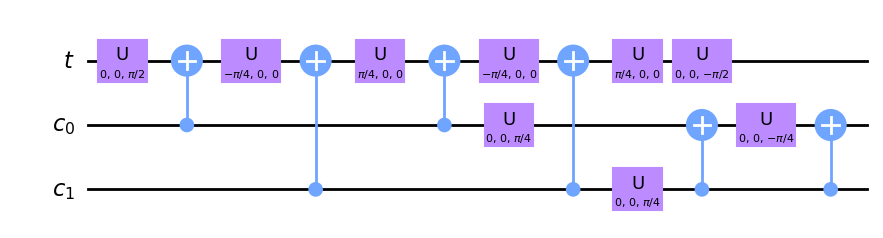

Gate Depth: 12

Matrix Representation:
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]


In [130]:
def addToffoli(toffoli_circ, control1, control2, target):
    '''Add Toffoli gate to the given quantum circuit.'''
    # Square root of pauli-X (C)
    toffoli_circ.u(0, 0, pi/2, target)
    toffoli_circ.cx(control1, target)

    # Cancellation (B)
    toffoli_circ.u(-pi/4, 0, 0, target)
    toffoli_circ.cx(control2, target)

    # Reverse Cancellation (B†)
    toffoli_circ.u(pi/4, 0, 0, target)
    toffoli_circ.cx(control1, target)
    
    # Cancellation (B)
    toffoli_circ.u(-pi/4, 0, 0, target)
    toffoli_circ.cx(control2, target)
    
    # Complete pauli-X (A)
    toffoli_circ.u(pi/4, 0, 0, target)
    toffoli_circ.u(0, 0, -pi/2, target)

    # Phase correction (alpha)
    toffoli_circ.u(0, 0, pi/4, control2)
    toffoli_circ.u(0, 0, pi/4, control1)
    toffoli_circ.cx(control2, control1)
    toffoli_circ.u(0, 0, -pi/4, control1)
    toffoli_circ.cx(control2, control1)


# Final Solution
controlReg = QuantumRegister(2, 'c')
targetReg = QuantumRegister(1,'t')
toffoli = QuantumCircuit(targetReg, controlReg, name="Toffoli")

addToffoli(toffoli, 1, 2, 0)

# Convert to Gate
toffoli.to_gate()


# Display Circuit
displayCirc(toffoli)

# Gate Depth
displayDepth(toffoli)

# Matrix Representation
print("Matrix Representation:")
print((np.round(np.array(Operator(toffoli).data)).real))

## Final CCCX Decomposition:
**Gate Depth:** 33  
**Ancilla:** 1

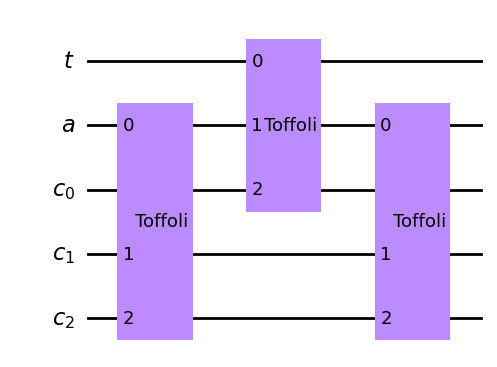

In [131]:
# Final Solution
controlReg = QuantumRegister(3, 'c')
ancillaReg = QuantumRegister(1, 'a')
targetReg = QuantumRegister(1,'t')

cccx = QuantumCircuit(targetReg, ancillaReg, controlReg)

# Decomposition of CCCX using Toffoli gates and an ancilla qubit
cccx.append(toffoli, [ancillaReg[0], controlReg[1], controlReg[2]])
cccx.append(toffoli, [targetReg[0], ancillaReg[0], controlReg[0]])
cccx.append(toffoli, [ancillaReg[0], controlReg[1], controlReg[2]])

# Display Circuit
displayCirc(cccx)



### Expanded Version:

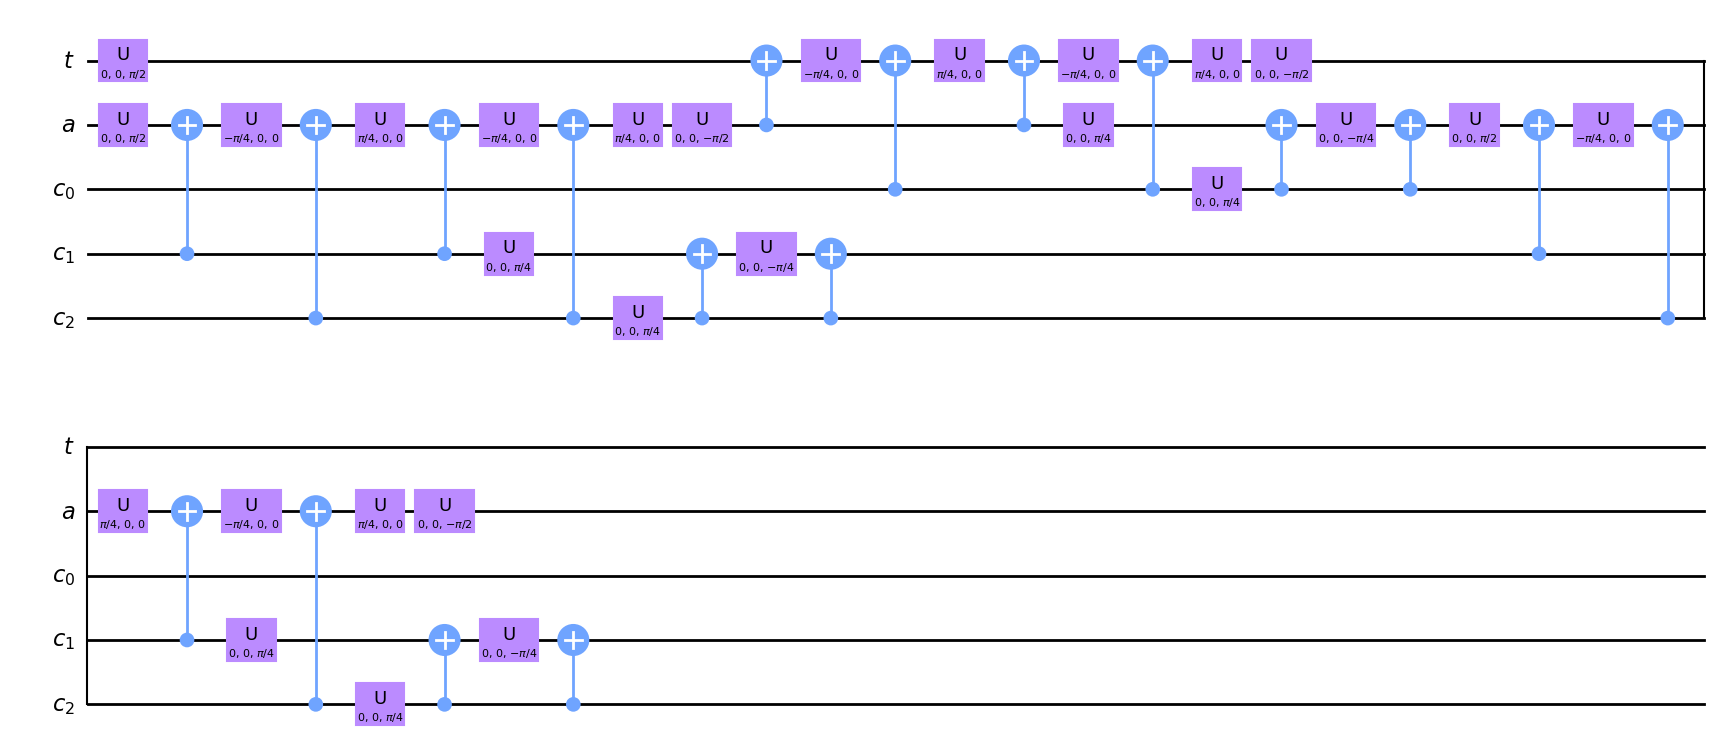

Gate Depth: 33



In [132]:
# Expanded Solution
cccxExpanded= QuantumCircuit(targetReg, ancillaReg, controlReg)

# Decompose CCCX using Toffoli gate sequences
addToffoli(cccxExpanded, 3, 4, 1)
addToffoli(cccxExpanded, 1, 2, 0)
addToffoli(cccxExpanded, 3, 4, 1)

# Display Circuit
displayCirc(cccxExpanded)

# Gate Depth
displayDepth(cccxExpanded)

## Bonus Method:
A general method to build any multi-controlled X gate is going to be an expansion on our previous work. We are going to apply the same strategy as with the CCCX gate and turn it into a method. 

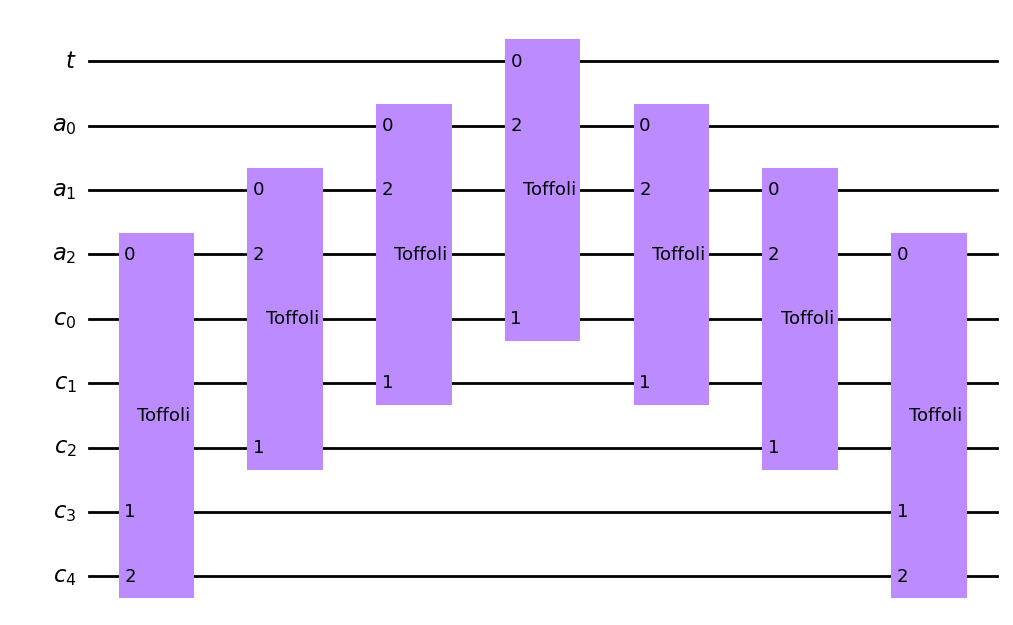

In [133]:
def mcx(control_count):
    """Create a multi-controlled X gate."""
    # Ensure a valid control count
    if control_count <= 0:
        raise ValueError("Number of control qubits must be greater than 0!")
      
    # For a single control qubit, just use CX
    if control_count == 1:
        circ = QuantumCircuit(2, name="CX")
        circ.cx(1, 0)
        return circ
    elif control_count == 2:
        circ = QuantumCircuit(3, name="CCX")
        circ.append(toffoli, [0, 1, 2])
        return circ
    
    # Create registers
    controlReg = QuantumRegister(control_count, 'c')
    ancillaReg = QuantumRegister(control_count-2, 'a')
    targetReg = QuantumRegister(1,'t')
    
    # Create quantum circuit and add registers
    circ = QuantumCircuit(targetReg, ancillaReg, controlReg)
    
    # Create Toffoli Iterations
    toffoliPositions = range(0, control_count-3)
    
    # Apply left branch of Toffoli gates
    circ.append(toffoli, [ancillaReg[control_count-3], controlReg[control_count-2], controlReg[control_count-1]])
    for i in toffoliPositions:
        circ.append(toffoli, [ancillaReg[control_count-4-i], controlReg[control_count-3-i], ancillaReg[control_count-3-i]])
    
    # Add center Toffoli that swaps target bit
    circ.append(toffoli, [targetReg[0], controlReg[0], ancillaReg[0]]) 
    
    # Apply right branch of Toffoli gates
    for i in reversed(toffoliPositions):
        circ.append(toffoli, [ancillaReg[control_count-4-i], controlReg[control_count-3-i], ancillaReg[control_count-3-i]])
    circ.append(toffoli, [ancillaReg[control_count-3], controlReg[control_count-2], controlReg[control_count-1]])
    
    return circ


# Create 5-Control Circuit
mcxCirc = mcx(5)

# Display Circuit
displayCirc(mcxCirc)

# My Approach
**Problem Statement:** *Using the U and CX gates shown below, decompose the matrices to obtain CCX and CCCX gates. As a bonus, create a method for constructing any multi-controlled X gate.*

**Valid Gates:** 
$$
U3(\theta, \phi, \lambda) = \begin{pmatrix}
\cos\left(\frac{\theta}{2}\right) & -e^{i\lambda} \sin\left(\frac{\theta}{2}\right) \\
e^{i\phi} \sin\left(\frac{\theta}{2}\right) & e^{i(\phi + \lambda)} \cos\left(\frac{\theta}{2}\right)
\end{pmatrix}
$$

$$
CX = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{pmatrix}
$$

## 2-Control Unitary Transformation Decomposition

My approach to decomposing the Toffoli and CCCX gate was starting at the desired end result and working back. Let's begin with a generalized 2 control unitary gate which will soon represent our Toffoli.

We have $C^2(U)$ gate where $U$ is our unitary operator and $C^2$ is our 2 control qubits. This can be broken down into:

![image](https://i.stack.imgur.com/Pu2er.png)

$V$ is a unitary operator that satisfies $V^2 = U$, so the square root of our original unitary matrix will be our $V$. This leads to the square root of the Pauli-X gate being our $V$ since that is the unitary operator of the Toffoli gate. This works because unitrary matrices are applied through matrix multiplication. Applying it twice will be equivalent to $U$ (in this case Pauli-X), and applying $V$ and $V^\dagger$ is equivalent to $I$. 

$$X = 
\begin{bmatrix}
0 & 1 \\
1 & 0 \\
\end{bmatrix}
$$

$$\sqrt{X} = \frac{1}{2}
\begin{bmatrix}
1+i & 1-i \\
1-i & 1+i \\
\end{bmatrix}
$$  

$$or$$

$$\sqrt{X} = \frac{1}{2}
\begin{bmatrix}
1-i & 1+i \\
1+i & 1-i \\
\end{bmatrix}
$$

What's also worth noting is that there are two forms of the $\sqrt{X}$ which are the conjugate transpose of eachother. We will choose the first option as our $V$ and the other will automatically be our $V^\dagger$. 

Before we can code this up and test its functionality, we need to convert $V$ to a valid gate for our decomposition. This means that we need to convert our new $V$ matrix to a U3 gate.
$$
U3(\theta, \phi, \lambda) = \begin{pmatrix}
\cos\left(\frac{\theta}{2}\right) & -e^{i\lambda} \sin\left(\frac{\theta}{2}\right) \\
e^{i\phi} \sin\left(\frac{\theta}{2}\right) & e^{i(\phi + \lambda)} \cos\left(\frac{\theta}{2}\right)
\end{pmatrix}
$$

$$ 
\theta = \frac{\pi}{2}  \\
\phi = \frac{\pi}{2}  \\
\lambda = -\frac{\pi}{2}  \\
$$ 

We can apply these values to the U3 gate and this will accurately represent our $V$ unitary matrix. Let's code the example from earlier.

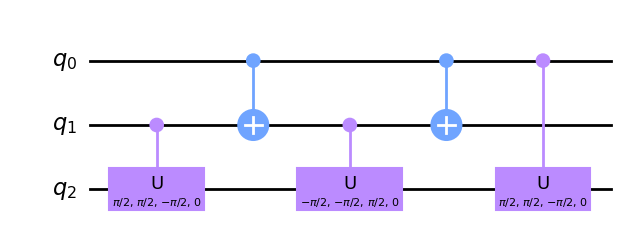

In [134]:
# Initialization
qc = QuantumCircuit(3)

# Apply the controlled version of our V unitary matrix
qc.cu(pi/2, pi/2, -pi/2, 0, 1, 2)
qc.cx(0, 1)

# Apply the conjugate transpose of our V unitary matrix
qc.cu(-pi/2, -pi/2, pi/2, 0, 1, 2)
qc.cx(0, 1)

# Apply the last V unitary matrix to complete the swap, if conditions are met
qc.cu(pi/2, pi/2, -pi/2, 0, 0, 2)

# Display Circuit
displayCirc(qc)

## 1-Control Unitary Transformation Decomposition

Before we can settle with this implementation, the controlled unitary gate was not a valid gate for our decomposition so we will also need to break this down further. 

![image2](https://ars.els-cdn.com/content/image/1-s2.0-S0924809903800252-gr4.jpg)

We can decompose our Controlled Unitary gate with ABC decomposition. This entails a 4 unitary gates that follow this criteria $
U = e^{i\alpha}AXBXC$ and $ABC = I$. If the control qubit has the value of $|1\rangle$ it will add the $X$ gates and equate to our desired unitary transformation. If the first qubit does not trigger the $CX$ gates, it will evaluate to $I$. We can achieve this with the help of $ZYZ$ decomposition. We first need to find our Euler Angles which will be our three values of $\theta$.

#### Given our unitary matrix

$$ U = \frac{1}{2} \begin{bmatrix}
1 + i & 1 - i \\
1 - i & 1 + i \\
\end{bmatrix} $$

We can determine the Z-Y-Z Euler angles as:

#### Compute $ \theta_1 $:

Using the formula:
$$ \theta_1 = 2 \arccos(|a|) $$
where \( a \) is the top-left element of the matrix, which is \( \frac{1+i}{2} \).

Given:
$$ |a| = |\frac{1+i}{2}| = \frac{\sqrt{2}}{2} $$
$$ \theta_1 = 2 \arccos\left(\frac{\sqrt{2}}{2}\right) = \frac{\pi}{2} $$

#### Compute $ \theta_0 + \theta_2 $ and $ \theta_0 - \theta_2 $

Using the formulas:
$$ \theta_0 + \theta_2 = \text{arg}(d) - \text{arg}(b) $$
$$ \theta_0 - \theta_2 = \text{arg}(c) + \text{arg}(b) $$
Given $ d = \frac{1+i}{2} $, $ b = \frac{1-i}{2} $, and $ c = \frac{1-i}{2} $:

$$ \text{arg}(d) = \frac{\pi}{4} $$
$$ \text{arg}(b) = -\frac{\pi}{4} $$
$$ \text{arg}(c) = -\frac{\pi}{4} $$

Using the above:
$$ \theta_0 + \theta_2 = \frac{\pi}{4} - (-\frac{\pi}{4}) = \frac{\pi}{2} $$
$$ \theta_0 - \theta_2 = -\frac{\pi}{4} + (-\frac{\pi}{4}) = -\frac{\pi}{2} $$

#### Compute $ \theta_0 $ and $ \theta_2 $:

From the results above:
$$ \theta_0 = 0 $$
$$ \theta_2 = \frac{\pi}{2} $$

#### Euler Angles

For the provided matrix, the Z-Y-Z Euler angles are:
$$ \theta_0 = 0, \theta_1 = \frac{\pi}{2}, \theta_2 = \frac{\pi}{2} $$

#### Calculate ABC with $\theta$ Values

$$A = R_Z(\theta_2)R_Y(\frac{1}{2}\theta_1)$$   
$$B = R_Y(-\frac{1}{2}\theta_1)R_Z(-\frac{1}{2}\theta_0-\frac{1}{2}\theta_2)$$   
$$C = R_Z(\frac{1}{2}\theta_0-\frac{1}{2}\theta_2)$$  

These evaluate to:  
$$A = R_Z(-\frac{\pi}{2})R_Y(\frac{\pi}{4})$$   
$$B = R_Y(-\frac{\pi}{4})$$   
$$C = R_Z(\frac{\pi}{2})$$ 
$$\alpha = \frac{\pi}{4}$$

Let's apply this to the blueprint of our ABC decomposition gate.

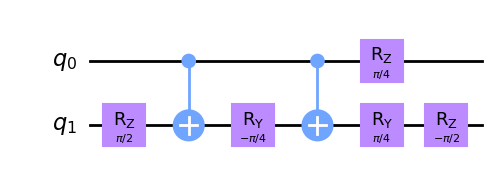

In [135]:
# Apply the controlled version of the ABC decomposition
qc = QuantumCircuit(2)

# Apply C gate
qc.rz(pi/2, 1)
qc.cx(0, 1)

# Apply B gate
qc.ry(-pi/4, 1)
qc.cx(0, 1)

# Apply A gate
qc.ry(pi/4, 1)
qc.rz(-pi/2, 1)
qc.rz(pi/4, 0)

# Display Circuit
displayCirc(qc)

This can be converted to our U3 gates by the rules:
$$ R_X(\theta) = U3(\theta, -\frac{\pi}{2}, \frac{\pi}{2})$$  
$$ R_Y(\theta) = U3(\theta, 0, 0)$$  
$$ R_Z(\theta) = U3(0, 0, \theta)$$  



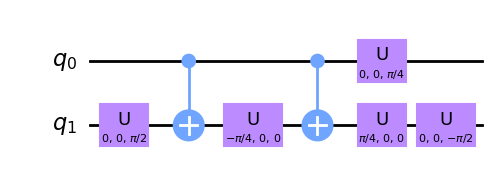

In [136]:
def addABC(qc, control, target, dagger=False):
    if not dagger:
        # Apply C gate
        qc.u(0, 0, pi/2, target)
        qc.cx(control, target)
        
        # Apply B gate
        qc.u(-pi/4, 0, 0, target)
        qc.cx(control, target)
        
        # Apply A gate
        qc.u(pi/4, 0, 0, target)
        qc.u(0, 0, -pi/2, target)
        qc.u(0, 0, pi/4, control)
    else:
        # Apply A† gate
        qc.u(0, 0, pi/2, target)
        qc.u(0, 0, -pi/4, control)
        qc.u(-pi/4, 0, 0, target)
        qc.cx(control, target)
        
        # Apply B† gate
        qc.u(pi/4, 0, 0, target)
        qc.cx(control, target)
        
        # Apply C† gate
        qc.u(0, 0, -pi/2, target)
        
# Create V Circuit
qc = QuantumCircuit(2)
addABC(qc, 0, 1)

# Display Circuit
displayCirc(qc)

## Combining the Decompositions

We have now broken down the unitary transformation to the fundamental building blocks. We can use this gate to work our way back up to our end result. Let's apply this gate to our original double control unitary decomposition.

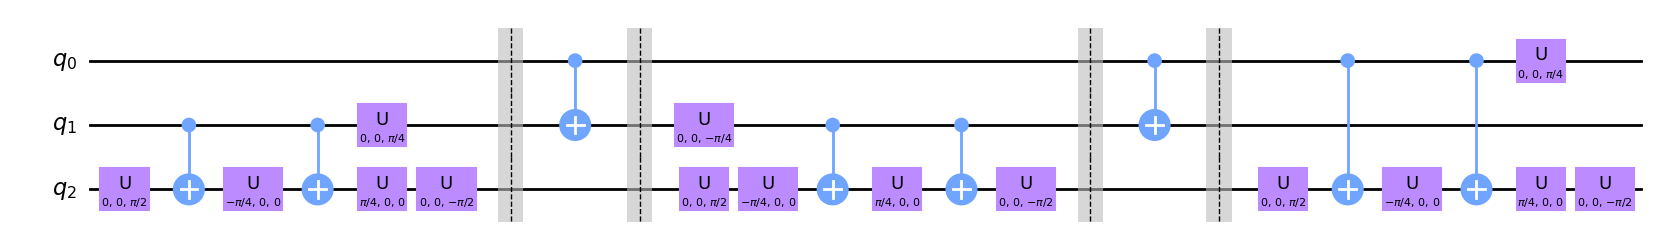

Gate Depth: 20



In [137]:
qc = QuantumCircuit(3)

# Apply Control V gate to circuit
addABC(qc, 1, 2)

qc.barrier(range(3))
qc.cx(0, 1)
qc.barrier(range(3))

# Apply Control V† gate to circuit
addABC(qc, 1, 2, dagger=True)

qc.barrier(range(3))
qc.cx(0, 1)
qc.barrier(range(3))

# Apply Control V gate to circuit
addABC(qc, 0, 2)

# Display Circuit
displayCirc(qc)

# Gate Depth
displayDepth(qc)

## Remove the Redundant Gates

This is a good start. We have a solution that works which contains only CX and U3 gates. Before we optimize this into our final solution, let's rename the gates for a clearer visual.

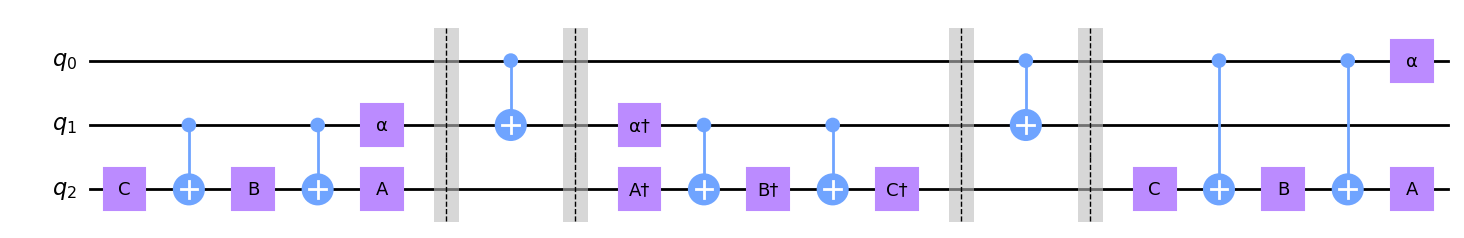

In [138]:
def create_gate(theta, phi, lam, name):
    circ = QuantumCircuit(1, name=name)
    circ.u(theta, phi, lam, 0)
    return circ.to_gate()

# Create C and C† Gates
c = create_gate(0, 0, pi/2, 'C')
c_Dagger = c.inverse().reverse_ops()
c_Dagger.name = 'C†'

# Create B and B† Gates
b = create_gate(-pi/4, 0, 0, 'B')
b_Dagger = b.inverse().reverse_ops()
b_Dagger.name = 'B†'

# Create A and A† Gates
a = create_gate(pi/4, 0, 0, 'A')
a_Dagger = a.inverse().reverse_ops()
a_Dagger.name = 'A†'

# Create α and α† Gates
alpha = create_gate(0, 0, pi/4, 'α')
alpha_Dagger = alpha.inverse().reverse_ops()
alpha_Dagger.name = 'α†'


def addFormattedABC(qc, control, target, dagger=False):
    if not dagger:
        # Apply C gate
        qc.append(c, [target])
        qc.cx(control, target)
        
        # Apply B gate
        qc.append(b, [target])
        qc.cx(control, target)
        
        # Apply A gate
        qc.append(a, [target])
        qc.append(alpha, [control])
    else:
        # Apply A gate
        qc.append(a_Dagger, [target])
        qc.append(alpha_Dagger, [control])
        qc.cx(control, target)
        
        # Apply B† gate
        qc.append(b_Dagger, [target])
        qc.cx(control, target)
        
        # Apply C† gate
        qc.append(c_Dagger, [target])

# Instantiate Circuit
qc = QuantumCircuit(3)

# Add Control V Gate
addFormattedABC(qc, 1, 2)

# ---------------------------------
qc.barrier(range(3))
qc.cx(0, 1)
qc.barrier(range(3))
# ---------------------------------

# Add Control V† Gate
addFormattedABC(qc, 1, 2, dagger=True)

# ---------------------------------
qc.barrier(range(3))
qc.cx(0, 1)
qc.barrier(range(3))
# ---------------------------------

# Add Control V Gate
addFormattedABC(qc, 0, 2)

# Display Circuit
displayCirc(qc)

We can remove a few unneccessary gates. The $A$ and $A\dagger$ next to the first set of barriers. Then the $C$ and $C\dagger$ next to the second set of barriers. These gates and their conjugate transpose are not separated by any other transformations so they are cancelling eachother out. They can be removed for efficiency. This will cut our depth by 5 and bring us down from 20 to 15. Though we still just as many CX gates which are known to be noisy and error prone. We need to bring this down as much as possible.

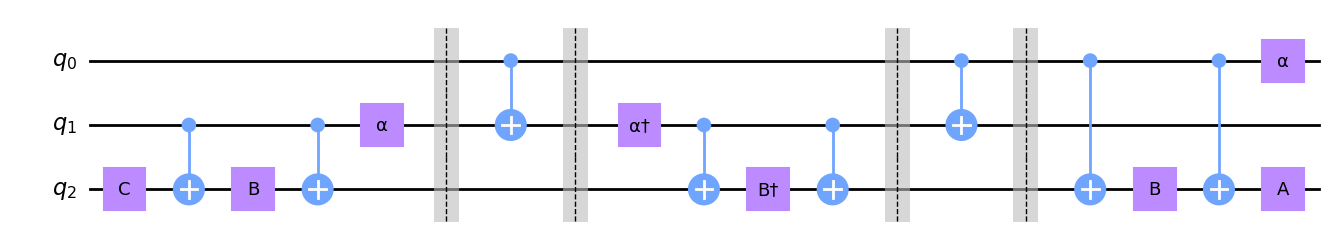

Gate Depth: 15



In [139]:
# Remove C Gate
qc.data.pop(18)
# Remove C† Gate
qc.data.pop(14)
# Remove A† Gate
qc.data.pop(9)
# Remove A Gate
qc.data.pop(4)

# Display Circuit
displayCirc(qc)

# Gate Depth
displayDepth(qc)

## Comparison to the Leading Decompositions

We can now compare to the best known decompositions of the Toffoli gate. Here is the one featured in Nielsen and Chuang:

![image3](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Toffoli_decomposition.svg/475px-Toffoli_decomposition.svg.png)

To achieve a similar decomposition we will need to shift a few things around. 

### 1. Combine alpha unitary transformations.  
![image4](https://i.stack.imgur.com/BaNPG.png)

### 2. Move CNOT gate that's between the second set of barriers over to the alpha gates. Add CNOTs to compensate for this change.  
![image5](https://i.stack.imgur.com/dLzzA.png)

### 3. Shift CNOTs and alpha gates passed all other CNOTS and cancel out unnessesary CNOTs.  
![image6](https://i.stack.imgur.com/yvgPD.png)

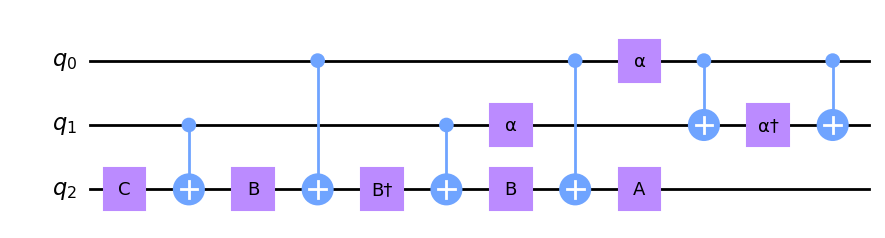

In [140]:
qc.data = []

# apply C gate
qc.append(c, [2])
qc.cx(1, 2)

# apply B gate
qc.append(b, [2])
qc.cx(0, 2)

# apply B† gate
qc.append(b_Dagger, [2])
qc.cx(1, 2)

# apply B gate
qc.append(b, [2])
qc.cx(0, 2)

# apply A gate
qc.append(a, [2])

# apply alpha gate
qc.append(alpha, [0])
qc.append(alpha, [1])
qc.cx(0, 1)

# apply alpha† gate
qc.append(alpha_Dagger, [1])
qc.cx(0, 1)

# Display Circuit
displayCirc(qc)

## Convert to Valid Decomposition and Matrix Representation

Before we can test its output, we first need to return it back to the U3 gates allowed in this decomposition and reverse the qubits so that we have a valid matrix representation of our toffoli.

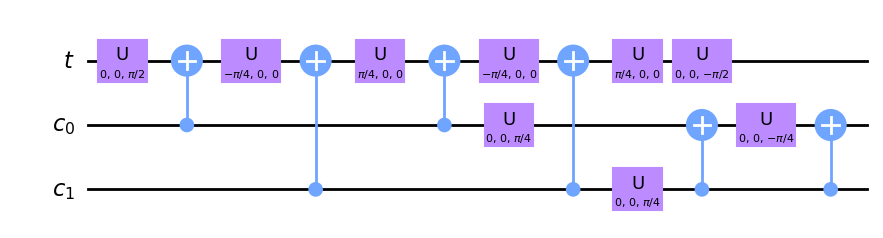

Gate Depth: 12

Matrix Representation:
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]


In [141]:
# Display Circuit
displayCirc(toffoli)

# Gate Depth
print("Gate Depth: " + str(toffoli.depth()) + '\n')

# Only Real Values
print("Matrix Representation:")
print(np.round(np.array(Operator(toffoli).data)).real)

We were able to achieve a gate depth of 12 with the use of only 6 CNOT gates which is very efficient for the decomposition.

## CCCX Gate and MCX Applications

Now that we have a functioning Toffoli gate, we can use this tool to piece together our subsequent gates. Our next gate for the screening task is the CCCX gate. This can be build with 3 Toffoli gates and 1 ancilla qubit, like so:

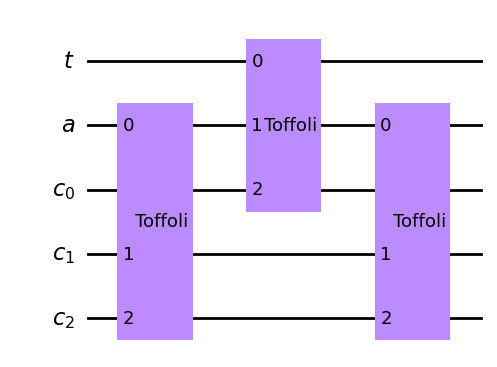

In [142]:
# Display Circuit
displayCirc(cccx)

The expanded version of this shows all of the CNOT and U3 gates:

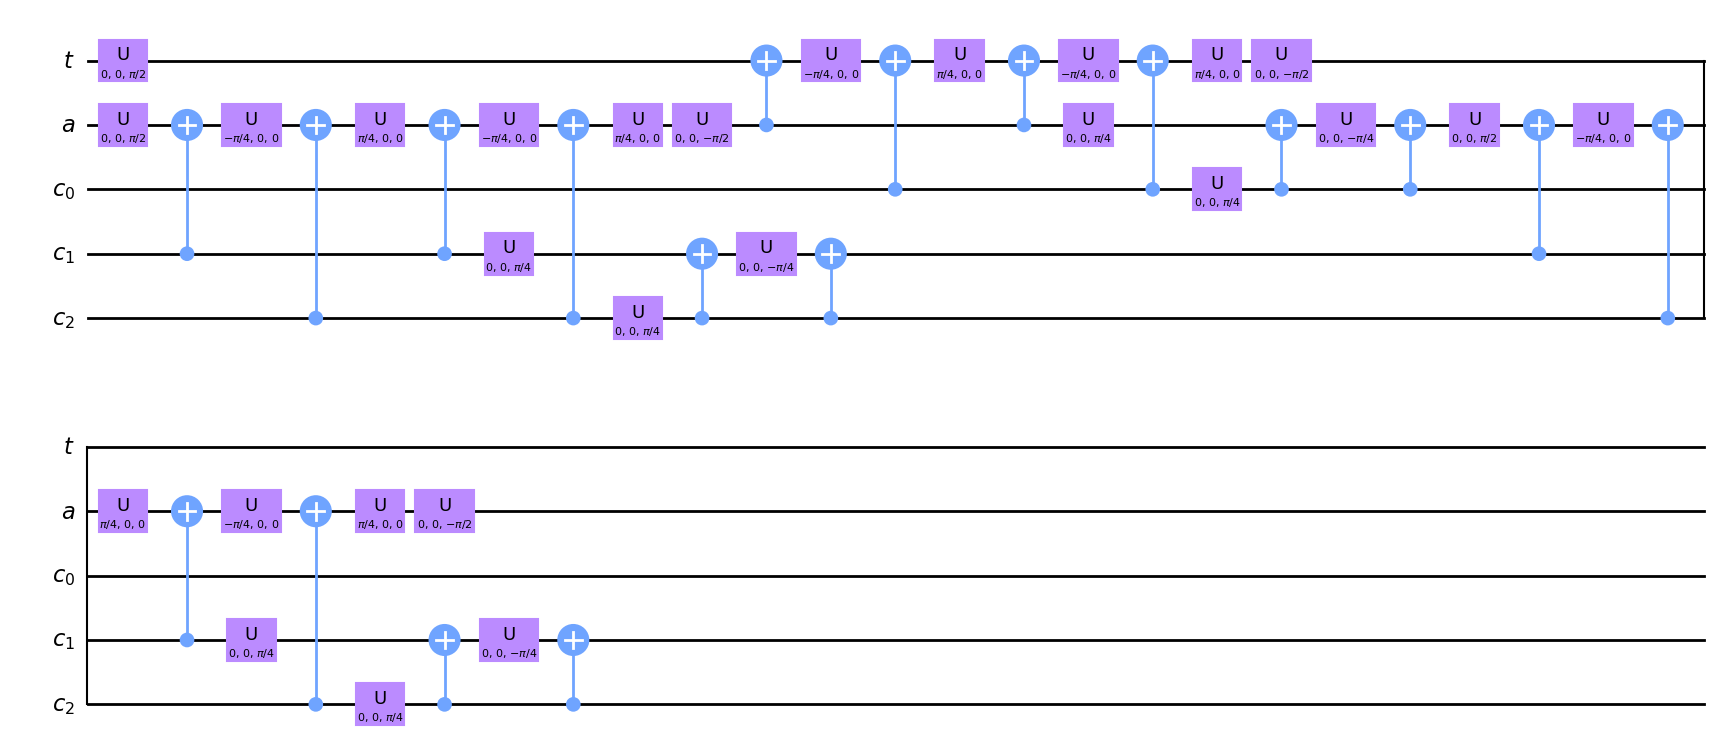

Gate Depth: 33



In [143]:
# Display Circuit
displayCirc(cccxExpanded)

# Gate Depth
displayDepth(cccxExpanded)

## Applying this to Multi-Controlled X Gates

Notice that this sort of algorithm for creating the CCCX gate can also be applied to any arbitrary Multi-Control X Gate. Though we would need $n-2$ ancilla qubits where $n$ is the number of controls in this gate. This reflection of the Toffoli gates is to reset the ancilla gates back to their original $|0\rangle$ state.   
[Method Code](#Bonus-Method:)

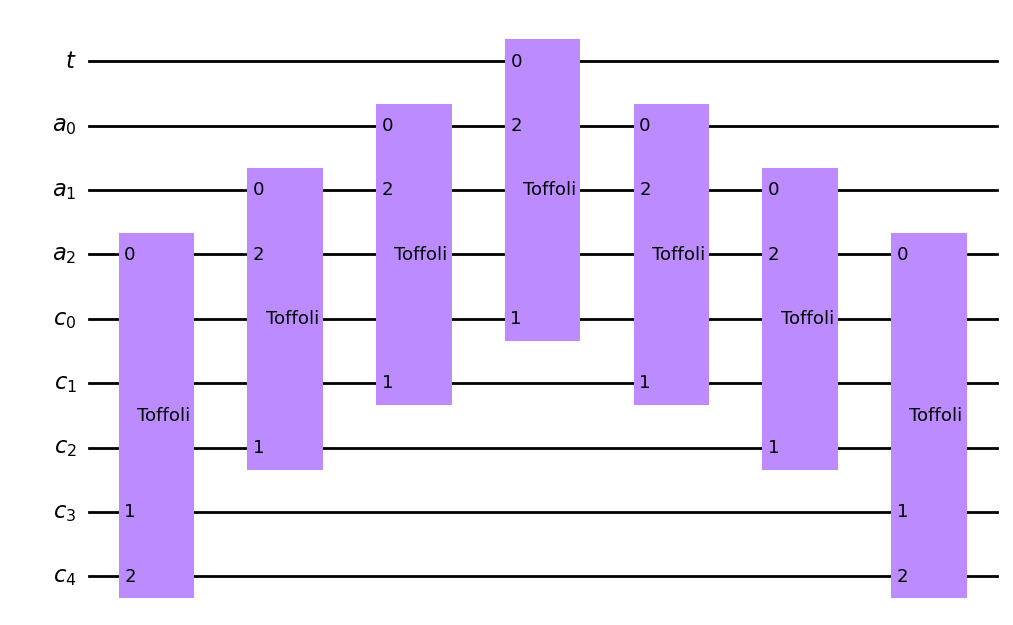

In [144]:
# Create MCX Circuit
mcxCirc = mcx(5)
# Display Circuit
displayCirc(mcxCirc)

# Conclusion
Originally I selected this screening task for the inherent challenge. While I had previous experience implementing the Grover and Deutsch-Jozsa Algorithms, the first 2 tasks were familiar. Task 3 on the other hand was entirely new territory for me. This gave a great oppurtunity to push my boundaries. 

Some of the major takeaways were the hundreds of methods for decomposition. There are countless algorithms, implementations, and strategies to break these gates down to something a Quantum Computer can work with. Next, not all unitary operations can be represented exactly by parameterized gates. Sometimes with our U3 gate, we are forced to approximate or use a sequence of multiple gates to achieve an operation. Finally, I realized the tradeoffs of performance that we need to evaluate when assessing the type of decomposition we need. We need to look at our Quantum Computers limitations. This could be the number of available gates, speed, etc. These limitations will define what kind of decomposition we should do for the best performance from our machine.  

If you have any questions or need any sort of clarification, don't hesitate to contact me at this email:  
swhite75@asu.edu

Thank you again for considering my application. Have a great day!

# References
Barenco, A., Bennett, C. H., Cleve, R., DiVincenzo, D. P., Margolus, N., Shor, P., Sleator, T., Smolin, J. A., & Weinfurter, H. (1995). Elementary gates for quantum computation. Physical Review A, 52(5), 3457-3467. https://doi.org/10.1103/physreva.52.3457

Baker, J. M., Duckering, C., Hoover, A., & Chong, F. T. (2019). Decomposing Quantum Generalized Toffoli with an Arbitrary Number of Ancilla. arXiv preprint arXiv:1904.01671. https://arxiv.org/abs/1904.01671

Crooks, G. E. (2023). Gates, States, and Circuits: Notes on the circuit model of quantum computation (Tech. Note 014 v0.9.0 beta). https://threeplusone.com/gates